# Stroke Data Pre-processing and Training

## Imports

In [1]:
import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import __version__ as sklearn_version
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB, CategoricalNB
from sklearn.preprocessing import scale, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingClassifier 
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.pipeline import make_pipeline

import warnings
warnings.filterwarnings("ignore")


## Load Data

In [2]:
stroke_data = pd.read_csv('healthcare-dataset-stroke-data.csv_step_2_features.csv')
stroke_data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,target
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


## Encoding

In [3]:
print("Unique Values for gender", stroke_data['gender'].unique())
print("Unique Values for ever_married", stroke_data['ever_married'].unique())
print("Unique Values for work_type", stroke_data['work_type'].unique())
print("Unique Values for residence_type", stroke_data['residence_type'].unique())
print("Unique Values for smoking_status", stroke_data['smoking_status'].unique())

Unique Values for gender ['Male' 'Female' 'Other']
Unique Values for ever_married ['Yes' 'No']
Unique Values for work_type ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Unique Values for residence_type ['Urban' 'Rural']
Unique Values for smoking_status ['formerly smoked' 'never smoked' 'smokes' 'Unknown']


In [4]:
#Label Encoding
#For categorical labels, each data is assigned a unique integer 

ever_married_mapping = {'No': 0, 'Yes': 1}
stroke_data['ever_married'] = stroke_data['ever_married'].map(ever_married_mapping)

In [5]:
residence_type_mapping = {'Rural': 0, 'Urban': 1}
stroke_data['residence_type'] = stroke_data['residence_type'].map(residence_type_mapping)


## One-Hot Encoding
One Hot Encoding is the binary representation of categorical variables. This process requires categorical values to be mapped to integer values first. Next, each integer value is represented as a binary vector with all values zero except the integer index marked with 1.

One Hot Encoding makes the representation of categorical data more expressive and easy. Many machine learning algorithms cannot work directly with categorical data, so categories must be converted to numbers. This operation is required for input and output variables that are categorical.


In [6]:
onehotencoder = OneHotEncoder()

In [7]:
stroke_data['gender'] = pd.Categorical(stroke_data['gender'])
datasetDummies_gender = pd.get_dummies(stroke_data['gender'], prefix = 'gender_encoded')
datasetDummies_gender

,gender_encoded_Female,gender_encoded_Male,gender_encoded_Other
0,0,1,0
1,0,1,0
2,1,0,0
3,1,0,0
4,0,1,0
...,...,...,...
4904,1,0,0
4905,1,0,0
4906,1,0,0
4907,0,1,0


In [8]:
stroke_data['work_type'] = pd.Categorical(stroke_data['work_type'])
datasetDummies_work_type = pd.get_dummies(stroke_data['work_type'], prefix = 'work_type_encoded')
datasetDummies_work_type

,work_type_encoded_Govt_job,work_type_encoded_Never_worked,work_type_encoded_Private,work_type_encoded_Self-employed,work_type_encoded_children
0,0,0,1,0,0
1,0,0,1,0,0
2,0,0,1,0,0
3,0,0,0,1,0
4,0,0,1,0,0
...,...,...,...,...,...
4904,0,0,0,0,1
4905,0,0,0,1,0
4906,0,0,0,1,0
4907,0,0,1,0,0


In [9]:
stroke_data['smoking_status'] = pd.Categorical(stroke_data['smoking_status'])
datasetDummies_smoking_status = pd.get_dummies(stroke_data['smoking_status'], prefix = 'smoking_status_encoded')
datasetDummies_smoking_status

,smoking_status_encoded_Unknown,smoking_status_encoded_formerly smoked,smoking_status_encoded_never smoked,smoking_status_encoded_smokes
0,0,1,0,0
1,0,0,1,0
2,0,0,0,1
3,0,0,1,0
4,0,1,0,0
...,...,...,...,...
4904,1,0,0,0
4905,0,0,1,0
4906,0,0,1,0
4907,0,1,0,0


In [10]:
stroke_data.drop("gender", axis=1, inplace=True)
stroke_data.drop("work_type", axis=1, inplace=True)
stroke_data.drop("smoking_status", axis=1, inplace=True)

In [11]:
stroke_data = pd.concat([stroke_data, datasetDummies_gender], axis=1)
stroke_data = pd.concat([stroke_data, datasetDummies_work_type], axis=1)
stroke_data = pd.concat([stroke_data, datasetDummies_smoking_status], axis=1)
stroke_data

,id,age,hypertension,heart_disease,ever_married,residence_type,avg_glucose_level,bmi,target,gender_encoded_Female,...,gender_encoded_Other,work_type_encoded_Govt_job,work_type_encoded_Never_worked,work_type_encoded_Private,work_type_encoded_Self-employed,work_type_encoded_children,smoking_status_encoded_Unknown,smoking_status_encoded_formerly smoked,smoking_status_encoded_never smoked,smoking_status_encoded_smokes
0,9046,67.0,0,1,1,1,228.69,36.6,1,0,...,0,0,0,1,0,0,0,1,0,0
1,31112,80.0,0,1,1,0,105.92,32.5,1,0,...,0,0,0,1,0,0,0,0,1,0
2,60182,49.0,0,0,1,1,171.23,34.4,1,1,...,0,0,0,1,0,0,0,0,0,1
3,1665,79.0,1,0,1,0,174.12,24.0,1,1,...,0,0,0,0,1,0,0,0,1,0
4,56669,81.0,0,0,1,1,186.21,29.0,1,0,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4904,14180,13.0,0,0,0,0,103.08,18.6,0,1,...,0,0,0,0,0,1,1,0,0,0
4905,44873,81.0,0,0,1,1,125.20,40.0,0,1,...,0,0,0,0,1,0,0,0,1,0
4906,19723,35.0,0,0,1,0,82.99,30.6,0,1,...,0,0,0,0,1,0,0,0,1,0
4907,37544,51.0,0,0,1,0,166.29,25.6,0,0,...,0,0,0,1,0,0,0,1,0,0


## Train-Test Split

In [12]:
features = ['age',
 'hypertension',
 'heart_disease',
 'ever_married',
 'residence_type',
 'avg_glucose_level',
 'bmi',
 'gender_encoded_Female',
 'gender_encoded_Male',
 'gender_encoded_Other',
 'work_type_encoded_Govt_job',
 'work_type_encoded_Never_worked',
 'work_type_encoded_Private',
 'work_type_encoded_Self-employed',
 'work_type_encoded_children',
 'smoking_status_encoded_Unknown',
 'smoking_status_encoded_formerly smoked',
 'smoking_status_encoded_never smoked',
 'smoking_status_encoded_smokes']

label = ['target']

X = stroke_data[features]
y = stroke_data[label]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 

print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')

Total # of sample in whole dataset: 4909
Total # of sample in train dataset: 3436


In [14]:
#Standardization

ss=StandardScaler()

X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

## Scores of Models

These are the ML algorithms that will apply to dataset. Results will contain train-validation-test scores, confusion matrix, statistical information and classification reports for each algorithm.

In [15]:
models = {
    'GaussianNB': GaussianNB(),
    'BernoulliNB': BernoulliNB(),
    'LogisticRegression': LogisticRegression(),
    'RandomForestClassifier': RandomForestClassifier(),
    'SupportVectorMachine': SVC(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'Stochastic Gradient Descent':  SGDClassifier(max_iter=5000, random_state=0),
    'Neural Nets': MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5000, 10), random_state=1),
}

modelNames = ["GaussianNB", 'BernoulliNB','LogisticRegression','RandomForestClassifier','SupportVectorMachine',
             'DecisionTreeClassifier', 'KNeighborsClassifier','GradientBoostingClassifier',
             'Stochastic Gradient Descent', 'Neural Nets']

trainScores = []
testScores = []

for m in models:
  model = models[m]
  model.fit(X_train, y_train)
    
  print(f'{m}') 
  train_score = model.score(X_train, y_train)
  print(f'Train score of trained model: {train_score*100}')
  trainScores.append(train_score*100)


  test_score = model.score(X_test, y_test)
  print(f'Test score of trained model: {test_score*100}')
  testScores.append(test_score*100)
  print(" ")
    
  y_predictions = model.predict(X_test)
  conf_matrix = confusion_matrix(y_predictions, y_test)

  print(f'Confussion Matrix: \n{conf_matrix}\n')

  predictions = model.predict(X_test)
  cm = confusion_matrix(predictions, y_test)

  tn = conf_matrix[0,0]
  fp = conf_matrix[0,1]
  tp = conf_matrix[1,1]
  fn = conf_matrix[1,0]
  accuracy  = (tp + tn) / (tp + fp + tn + fn)
  precision = tp / (tp + fp)
  recall    = tp / (tp + fn)
  f1score  = 2 * precision * recall / (precision + recall)
  specificity = tn / (tn + fp)
  print(f'Accuracy : {accuracy}')
  print(f'Precision: {precision}')
  print(f'Recall   : {recall}')
  print(f'F1 score : {f1score}')
  print(f'Specificity : {specificity}')
  print("") 
  print(f'Classification Report: \n{classification_report(predictions, y_test)}\n')
  print("")
   
  for m in range (1):
    current = modelNames[m]
    modelNames.remove(modelNames[m])

  preds = model.predict(X_test)
  confusion_matr = confusion_matrix(y_test, preds) #normalize = 'true'
  print("############################################################################")
  print("")
  print("")
  print("")

GaussianNB
Train score of trained model: 18.131548311990684
Test score of trained model: 18.94093686354379
 
Confussion Matrix: 
[[ 207    0]
 [1194   72]]

Accuracy : 0.1894093686354379
Precision: 1.0
Recall   : 0.05687203791469194
F1 score : 0.10762331838565023
Specificity : 1.0

Classification Report: 
              precision    recall  f1-score   support

           0       0.15      1.00      0.26       207
           1       1.00      0.06      0.11      1266

    accuracy                           0.19      1473
   macro avg       0.57      0.53      0.18      1473
weighted avg       0.88      0.19      0.13      1473



############################################################################



BernoulliNB
Train score of trained model: 94.17927823050059
Test score of trained model: 93.55057705363204
 
Confussion Matrix: 
[[1371   65]
 [  30    7]]

Accuracy : 0.9355057705363204
Precision: 0.09722222222222222
Recall   : 0.1891891891891892
F1 score : 0.12844036697247707
Speci

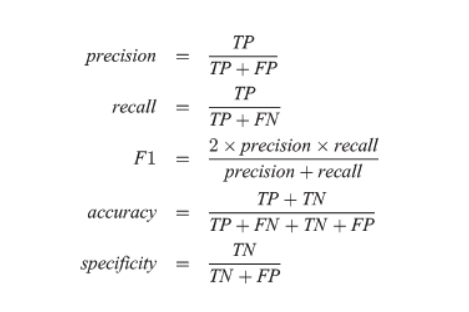

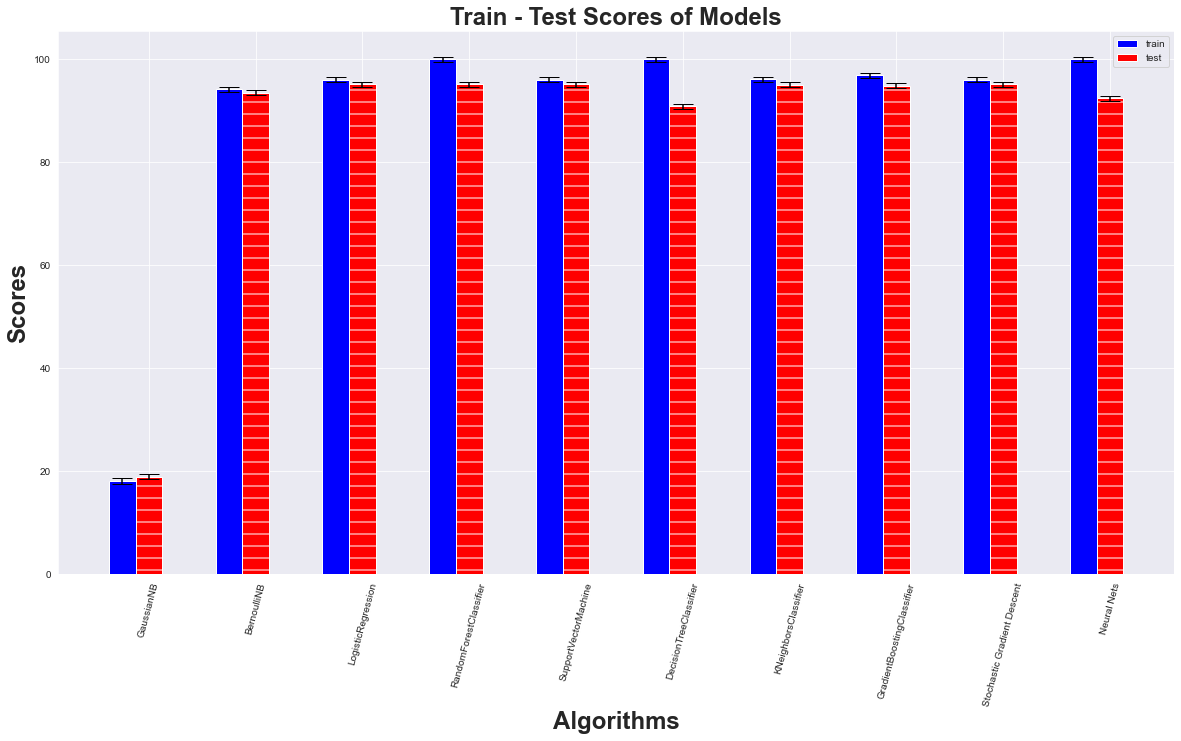

In [16]:
plt.figure(figsize=(20,10))
sns.set_style('darkgrid')
plt.title('Train - Test Scores of Models', fontweight='bold', size = 24)

barWidth = 0.25
 
bars1 = trainScores
bars2 = testScores
 
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
 
plt.bar(r1, bars1, color='blue', width=barWidth, edgecolor='white', label='train', yerr=0.5,ecolor="black",capsize=10)
plt.bar(r2, bars2, color='red', width=barWidth, edgecolor='white', label='test', yerr=0.5,ecolor="black",capsize=10, hatch = '-')
 
modelNames = ["GaussianNB", 'BernoulliNB','LogisticRegression','RandomForestClassifier','SupportVectorMachine',
             'DecisionTreeClassifier', 'KNeighborsClassifier','GradientBoostingClassifier',
             'Stochastic Gradient Descent', 'Neural Nets']
    
plt.xlabel('Algorithms', fontweight='bold', size = 24)
plt.ylabel('Scores', fontweight='bold', size = 24)
plt.xticks([r + barWidth for r in range(len(bars1))], modelNames, rotation = 75)
 
plt.legend()
plt.show()

## Evaluation of Models

In [17]:
for i in range(10):
    print(f'Accuracy of {modelNames[i]} -----> {testScores[i]}')

Accuracy of GaussianNB -----> 18.94093686354379
Accuracy of BernoulliNB -----> 93.55057705363204
Accuracy of LogisticRegression -----> 95.11201629327903
Accuracy of RandomForestClassifier -----> 95.17990495587237
Accuracy of SupportVectorMachine -----> 95.11201629327903
Accuracy of DecisionTreeClassifier -----> 90.90291921249151
Accuracy of KNeighborsClassifier -----> 95.04412763068567
Accuracy of GradientBoostingClassifier -----> 94.84046164290564
Accuracy of Stochastic Gradient Descent -----> 95.11201629327903
Accuracy of Neural Nets -----> 92.39646978954514


It looks like there are only 72 negative examples in the ~1400 example test set. This shouldn't affect the tree-based models too much, but a bunch of the other models will simply predict the positive class every time because it gives them 95% accuracy (SVM and Logistic results). So any model needs to be beating 95% accuracy in order to beat a 'random' model. 

### ROC Curve

In [18]:
from sklearn.metrics import roc_curve, roc_auc_score

# Instantiate the classfiers
classifiers = [GaussianNB(), 
               BernoulliNB(),
               LogisticRegression(),
               RandomForestClassifier(),
               DecisionTreeClassifier(), 
               KNeighborsClassifier(), 
               GradientBoostingClassifier(),
               MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5000, 10), random_state=1),
               SVC(probability=True)]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for cls in classifiers:
    print (cls) 
    model = cls.fit(X_train, y_train)
    yproba = model.predict_proba(X_test)[::,1]
    
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

GaussianNB()
BernoulliNB()
LogisticRegression()
RandomForestClassifier()
DecisionTreeClassifier()
KNeighborsClassifier()
GradientBoostingClassifier()
MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5000, 10), random_state=1,
              solver='lbfgs')
SVC(probability=True)


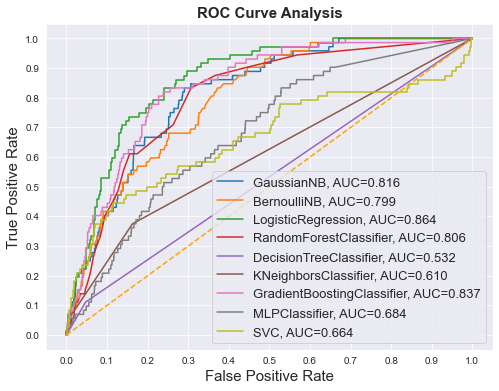

In [19]:
fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

Logistic Regression has the largest AUC=0.864. Will use this alogorithm 

## AUC using Cross Validation

[0.83549784 0.77532468 0.81212121 0.92640693 0.85735931 0.87034632
 0.8020979  0.77832168 0.904662   0.7646548 ]


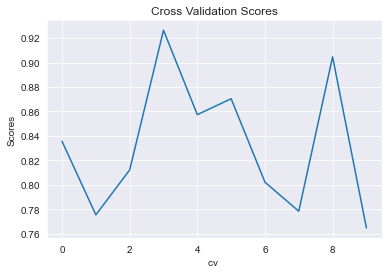

In [21]:
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)
cv_scores = cross_val_score(logreg_model, X = X_train, y = y_train, cv = 10, scoring='roc_auc')
print(cv_scores)

plt.title("Cross Validation Scores")
plt.xlabel("cv ")
plt.ylabel("Scores")
plt.plot(cv_scores)

In [22]:
accuracies = cross_val_score(estimator = logreg_model, X = X_train, y = y_train, cv = 10)
print("Accuracy (mean):", accuracies.mean()*100, "%")
print("std: ", accuracies.std()*100)

Accuracy (mean): 96.04201979795242 %
std:  0.1394075758670091


In [23]:
scores = cross_val_score(logreg_model, X_train, y_train, scoring = 'neg_mean_absolute_error', cv = 10)
print ("MAE:", scores.mean())

MAE: -0.039579802020475965


## Best Features Selection

In [24]:
# I wrote this part again because X y changed above, in the k-nn visualization. 
features = ['age',
 'hypertension',
 'heart_disease',
 'ever_married',
 'residence_type',
 'avg_glucose_level',
 'bmi',
 'gender_encoded_Female',
 'gender_encoded_Male',
 'gender_encoded_Other',
 'work_type_encoded_Govt_job',
 'work_type_encoded_Never_worked',
 'work_type_encoded_Private',
 'work_type_encoded_Self-employed',
 'work_type_encoded_children',
 'smoking_status_encoded_Unknown',
 'smoking_status_encoded_formerly smoked',
 'smoking_status_encoded_never smoked',
 'smoking_status_encoded_smokes']

label = ['target']

X = stroke_data[features]
y = stroke_data[label]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 

print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

sc=StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Total # of sample in whole dataset: 4909
Total # of sample in train dataset: 3436
Total # of sample in test dataset: 1473


RandomForestClassifier
Old Shape: (4909, 19) New shape: (4909, 3)




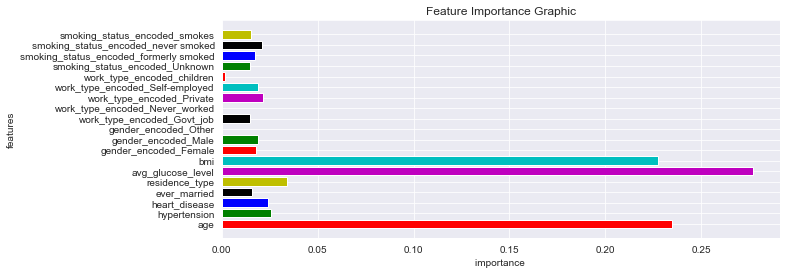

DecisionTreeClassifier
Old Shape: (4909, 19) New shape: (4909, 3)




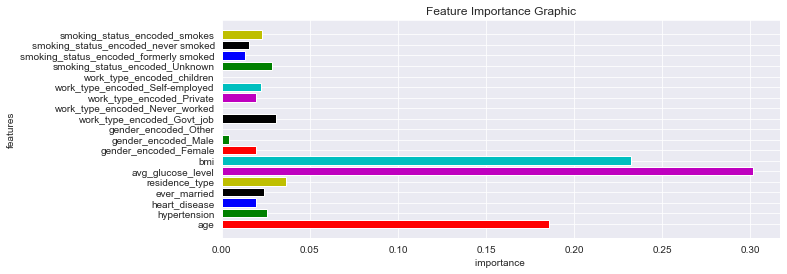

GradientBoostingClassifier
Old Shape: (4909, 19) New shape: (4909, 3)




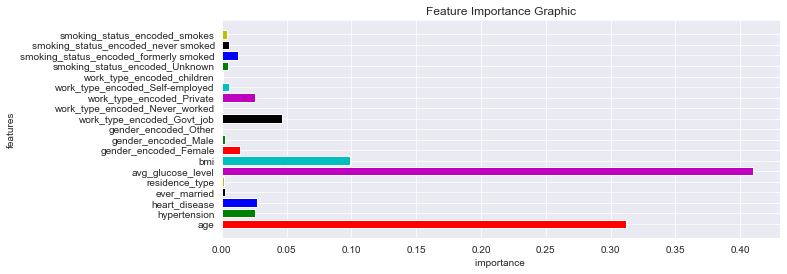

In [25]:
models = {
    'RandomForestClassifier': RandomForestClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier()
}

for m in models:
  model = models[m]
  model.fit(X_train, y_train)
  
  print(f'{m}') 
  best_features = SelectFromModel(model)
  best_features.fit(X, y)

  transformedX = best_features.transform(X)
  print(f"Old Shape: {X.shape} New shape: {transformedX.shape}")
  print("\n")

  imp_feature = pd.DataFrame({'Feature': features, 'Importance': model.feature_importances_})
  plt.figure(figsize=(10,4))
  plt.title("Feature Importance Graphic")
  plt.xlabel("importance ")
  plt.ylabel("features")
  plt.barh(imp_feature['Feature'],imp_feature['Importance'],color = 'rgbkymc')
  plt.show()

In [26]:
models = {
    'BernoulliNB': BernoulliNB(),
    'LogisticRegression': LogisticRegression(),
    'Stochastic Gradient Descent':  SGDClassifier(max_iter=5000, random_state=0),
}

for m in models:
  model = models[m]
  model.fit(X_train, y_train)
  
  print(f'{m}') 
  best_features = SelectFromModel(model)
  best_features.fit(X, y)

  transformedX = best_features.transform(X)
  print(f"Old Shape: {X.shape} New shape: {transformedX.shape}")
  print("\n")

BernoulliNB
Old Shape: (4909, 19) New shape: (4909, 7)


LogisticRegression
Old Shape: (4909, 19) New shape: (4909, 8)


Stochastic Gradient Descent
Old Shape: (4909, 19) New shape: (4909, 8)




In [27]:
#save data

stroke_data.to_csv(r'C:\Users\Myngoc\Desktop\Data Science\Capstone Two\healthcare-dataset-stroke-data.csv_step_3_preprocessing_training.csv', index=False)